In [39]:
#Importing the data
import os
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [21]:
url = "https://github.com/SagaraKohsuke/graspp-25S-innovation/raw/refs/heads/main/data/2023_kaku_01-10.xls"
df = pd.read_excel(url, sheet_name="2023_kaku_01-10", skiprows=7)

In [22]:
df.head()

,産業分類コード,産業分類名称,時間軸コード,年度,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,総合計,総合計,2018100000,2018年度,8524,379239845,14995840,12410847,2584993,1095466,355623,3.95,1289173,138904,77151,1747,706720,9419,222478
1,総合計,総合計,2019100000,2019年度,8450,373249339,15159301,12326932,2832369,466423,590544,4.06,1169754,122358,106903,1687,643329,9276,222104
2,総合計,総合計,2020100000,2020年度,8567,351401637,14702133,12267987,2434146,356821,415900,4.18,703094,129773,105008,1699,733591,8759,165714
3,総合計,総合計,2021100000,2021年度,9493,397955022,16031169,13244582,2786587,408540,404899,4.03,823443,299388,96599,2728,999958,10676,211864
4,総合計,総合計,2022100000,2022年度,9358,451194806,17575155,14459674,3115481,312930,478445,3.9,821080,127691,62223,2514,1065649,11529,257059


In [23]:
df.columns

Index(['産業分類コード', '産業分類名称', '時間軸コード', '年度', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [25]:
# 1.2 Manipulate Data
# rename columns
cols_dont_rename = list(df.columns[:4])
cols_for_rename  = ['研究開発企業数', '研究開発売上高', '研究開発研究開発費計', '研究開発研究開発費自社研究開発費', '研究開発研究開発費委託研究開発費', '研究開発研究開発費委託研究開発費うち、関係会社への委託国内', '研究開発研究開発費委託研究開発費うち、関係会社への委託海外', '研究開発売上高研究開発費比率', '研究開発受託研究費', '研究開発受託研究費うち、関係会社からの受託国内', '研究開発受託研究費うち、関係会社からの受託海外', '研究開発投資企業数', '研究開発投資当期取得額', '能力開発企業数', '能力開発能力開発費']
df.columns = cols_dont_rename + cols_for_rename

# eliminate '***' or 'X' data
df = df.replace(['***','X'], np.nan)

# change data types
df[cols_dont_rename] = df[cols_dont_rename].astype(str)
#TODO Why convert to object, not string ???
df[cols_for_rename].astype(float)

,研究開発企業数,研究開発売上高,研究開発研究開発費計,研究開発研究開発費自社研究開発費,研究開発研究開発費委託研究開発費,研究開発研究開発費委託研究開発費うち、関係会社への委託国内,研究開発研究開発費委託研究開発費うち、関係会社への委託海外,研究開発売上高研究開発費比率,研究開発受託研究費,研究開発受託研究費うち、関係会社からの受託国内,研究開発受託研究費うち、関係会社からの受託海外,研究開発投資企業数,研究開発投資当期取得額,能力開発企業数,能力開発能力開発費
0,8524.0,379239845.0,14995840.0,12410847.0,2584993.0,1095466.0,355623.0,3.95,1289173.0,138904.0,77151.0,1747.0,706720.0,9419.0,222478.0
1,8450.0,373249339.0,15159301.0,12326932.0,2832369.0,466423.0,590544.0,4.06,1169754.0,122358.0,106903.0,1687.0,643329.0,9276.0,222104.0
2,8567.0,351401637.0,14702133.0,12267987.0,2434146.0,356821.0,415900.0,4.18,703094.0,129773.0,105008.0,1699.0,733591.0,8759.0,165714.0
3,9493.0,397955022.0,16031169.0,13244582.0,2786587.0,408540.0,404899.0,4.03,823443.0,299388.0,96599.0,2728.0,999958.0,10676.0,211864.0
4,9358.0,451194806.0,17575155.0,14459674.0,3115481.0,312930.0,478445.0,3.90,821080.0,127691.0,62223.0,2514.0,1065649.0,11529.0,257059.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,70.0
162,4.0,70839.0,154.0,105.0,49.0,NaN,NaN,0.22,NaN,NaN,NaN,NaN,NaN,26.0,577.0
163,47.0,NaN,NaN,NaN,7315.0,405.0,NaN,NaN,292.0,260.0,NaN,3.0,59.0,237.0,3251.0
164,80.0,3863125.0,204683.0,189146.0,15537.0,1086.0,1011.0,5.30,8079.0,485.0,6861.0,23.0,10362.0,254.0,4270.0


In [27]:
df.describe()

,研究開発企業数,研究開発売上高,研究開発研究開発費計,研究開発研究開発費自社研究開発費,研究開発研究開発費委託研究開発費,研究開発研究開発費委託研究開発費うち、関係会社への委託国内,研究開発研究開発費委託研究開発費うち、関係会社への委託海外,研究開発売上高研究開発費比率,研究開発受託研究費,研究開発受託研究費うち、関係会社からの受託国内,研究開発受託研究費うち、関係会社からの受託海外,研究開発投資企業数,研究開発投資当期取得額,能力開発企業数,能力開発能力開発費
count,158.000000,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.300000e+02,82.000000,145.000000,1.210000e+02,83.000000,43.000000,137.000000,1.100000e+02,165.000000,159.000000
mean,548.462025,2.722507e+07,1.103235e+06,9.090502e+05,1.942365e+05,3.158144e+04,54368.646341,3.093793,6.977097e+04,17050.783133,16340.604651,160.642336,8.277223e+04,594.509091,13534.471698
std,1899.730781,8.928789e+07,3.668347e+06,3.023930e+06,6.470967e+05,1.232053e+05,133385.810655,4.539650,2.231447e+05,46968.622182,30438.580848,515.082286,2.386022e+05,2098.814083,46960.929196
min,1.000000,2.425600e+04,3.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00,1.000000,0.030000,1.000000e+00,1.000000,5.000000,1.000000,3.500000e+01,1.000000,8.000000
25%,19.000000,6.755430e+05,3.395000e+03,2.709000e+03,3.210000e+02,1.322500e+02,103.000000,0.450000,1.750000e+02,44.000000,193.000000,5.000000,9.640000e+02,24.000000,421.500000
50%,59.500000,2.675571e+06,4.397500e+04,4.020700e+04,2.792000e+03,5.945000e+02,1715.000000,1.430000,1.214000e+03,430.000000,2043.000000,18.000000,5.875000e+03,77.000000,1208.000000
75%,147.000000,7.969487e+06,2.046830e+05,1.800610e+05,1.553700e+04,3.004500e+03,11381.250000,4.060000,1.568900e+04,4326.000000,12011.000000,51.000000,1.955225e+04,162.000000,3403.000000
max,9493.000000,4.511948e+08,1.757516e+07,1.445967e+07,3.115481e+06,1.095466e+06,590544.000000,37.540000,1.289173e+06,299388.000000,106903.000000,2728.000000,1.065649e+06,11529.000000,257059.000000


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from c

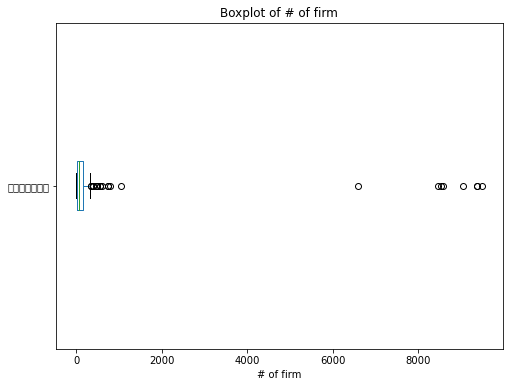

In [40]:
# Plot a boxplot for 研究開発企業数
plt.figure(figsize=(8, 6))
df['研究開発企業数'].plot(kind='box', vert=False)
plt.title('Boxplot of # of firm')
plt.xlabel('# of firm')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from c

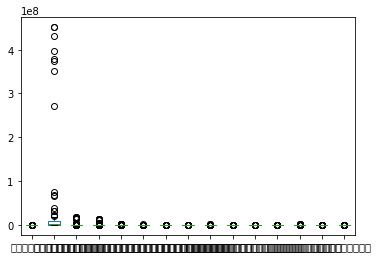

In [41]:
df.plot.box()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from c

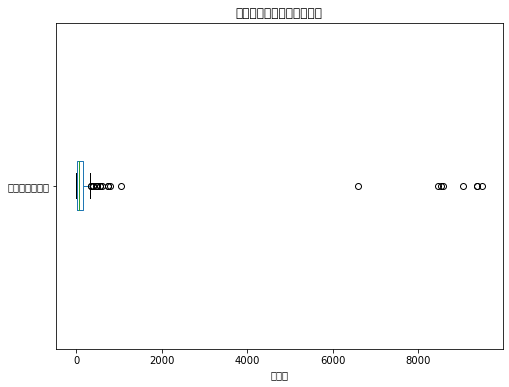

In [42]:
# Set font to IPAexGothic for Japanese characters
plt.rcParams['font.family'] = 'IPAexGothic'

# Plot a boxplot for 研究開発企業数
plt.figure(figsize=(8, 6))
df['研究開発企業数'].plot(kind='box', vert=False)
plt.title('研究開発企業数の箱ひげ図')
plt.xlabel('企業数')
plt.show()